<a href="https://colab.research.google.com/github/dgusfr/dataScience_statistic/blob/main/Inferential_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font size=10>Statistic - Inferential and Hypothesis Testing</font>
***

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# <font>DISTRIBUIÇÕES DE PROBABILIDADE</font>

Uma distribuição de probabilidade é uma função que descreve a probabilidade de ocorrência de diferentes resultados possíveis em um experimento. Em outras palavras, mostra a chance de cada valor de uma variável aleatória acontecer.
***

## Distribuição Binomial
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

<font size=6> $$P(k)=\binom{n}{k} p^k q^{n-k}$$ </font>

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

### Experimento Binomial  

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

### Média da distribuição binomial

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

<font size=6> $$\mu = n \times p$$ </font>

### Desvio padrão da distribuição binomial

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

<font size=6> $$\sigma = \sqrt{n \times p \times q}$$ </font>

In [4]:
from scipy.special import comb

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

***
<font size=5> **Exemplo**: Mega Sena </font>

Na Mega Sena, um jogo consiste em escolher 6 números dentre 60 disponíveis. Você, como um jogador curioso, quer calcular a probabilidade de ganhar com apenas um jogo. Para isso, primeiro precisamos descobrir quantas combinações diferentes de 6 números podem ser formadas com os 60 números do volante.

<font size=6>$$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$ </font>

In [5]:
combinacoes = comb(60, 6)
combinacoes

50063860.0

In [6]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000000019974489


***
<font size=5>**Exemplo**: Concurso para Cientista de Dados </font>

Um candidato decide se aventurar em um concurso para cientista de dados sem estudar. A prova consiste em **10 questões** de múltipla escolha, com **3 alternativas** por questão. Cada questão vale **1 ponto**. Sem nenhum conhecimento, o candidato decide chutar todas as respostas.

Objetivo

Sabendo que a nota de corte para aprovação é 5, calcule:

A probabilidade do candidato acertar **exatamente** 5 questões.
A probabilidade do candidato **ser aprovado** (acertar 5 ou mais questões).

<font size=5>Qual o número de ensaios ($n$)? </font>

In [7]:
n = 10
n

10

<font size=5>Os ensaios são independentes? </font>

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

<font size=5> Somente dois resultados são possíveis em cada ensaio? </font>

Sim. O candidato tem duas possibilidades, ACERTA ou ERRAR uma questão.

<font size=5> Qual a probabilidade de sucesso ($p$)? </font>

In [8]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

 Qual a probabilidade de fracasso ($q$)?

In [9]:
q = 1 - p
q

0.6666666666666667

 Qual o total de eventos que se deseja obter sucesso ($k$)?

In [10]:
k = 5
k

5

***

<font size=5>Solução 1 </font>

$$P(k)=\binom{n}{k} p^k q^{n-k}$$

In [11]:
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print('%0.8f' % probabilidade)

0.13656455


In [12]:
from scipy.stats import binom

***
<font size=5>Solução 2 </font>

In [13]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


<font size=4>Obter a probabilidade do candidato passar </font>

<font size=5> $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$</font>

<br>

Sendo: pmf = Função de Probabilidade

In [14]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

0.21312808006909476

In [15]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

0.21312808006909476

In [16]:
1 - binom.cdf(4, n, p)

0.21312808006909523

In [17]:
binom.sf(4, n, p)

0.21312808006909525

***
<font size=5> Exemplo: Gincana </font>

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

### Solução

In [18]:
p = 0.6
p

0.6

In [19]:
n = 12
n

12

In [20]:
k = 8
k

8

In [21]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [22]:
equipes = 30 * probabilidade
equipes

6.3852281856

---

## Distribuição Poisson
***

Imagine que você é dono de uma loja e quer entender quantos clientes entram na sua loja a cada hora. Você sabe que, em média, **10 clientes** entram por hora, mas esse número pode variar: às vezes entram 8, às vezes 12, às vezes até 15!

A Distribuição de Poisson te ajuda a entender essa variação e a probabilidade de um número específico de clientes entrar na sua loja em uma hora.

<font size=6> $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$ </font>

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

### Média da distribuição Poisson

<font size=6> $$\mu$$ </font>

### Desvio padrão da distribuição Poisson

<font size=6> $$\sigma = \sqrt{\mu}$$ </font>


In [23]:
import numpy as np
import math

In [24]:
np.e

2.718281828459045

***
<font size=5>Exemplo: Delivery</font>


Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

Qual o número médio de ocorrências por hora ($\mu$)?

In [25]:
media = 20

 Qual o número de ocorrências que queremos obter no período ($k$)?

In [26]:
k = 15

<font size=5> Solução 1 </font>

<font size=4> $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$ </font>


In [27]:
probabilidade = ((np.e ** (-media)) * (media ** k)) / (math.factorial(k))
print('%0.8f' % probabilidade)

0.05164885


### Solução 2

In [28]:
from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.05164885


---

##  Distribuição Normal
***

A distribuição normal é uma das ferramentas mais importantes da estatística. Ela descreve como muitos fenômenos naturais e sociais se comportam, como a altura das pessoas, a pressão arterial, as notas em um teste e muito mais.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É **simétrica** em torno da média;

2. A área sob a curva corresponde à proporção **1 ou 100%**;

3. As medidas de tendência central (média, mediana e moda) apresentam o **mesmo** valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua **média e desvio padrão**;

7. A probabilidade sempre será igual à **área sob a curva**, delimitada pelos limites inferior e superior.

<font size=6> $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$ </font>

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

<font size=5>  $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$ </font>


Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

<font size=6>$$Z = \frac{x-\mu}{\sigma}$$ </font>


Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

***
### Problema: Altura


Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

####  Problema A - Identificação da área sob a curva


<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

 Obter a variável padronizada $Z$

In [30]:
media = 1.7

In [31]:
desvio_padrao = 0.1

In [32]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

<font size=5>  Solução 1 - Utilizando tabela</font>

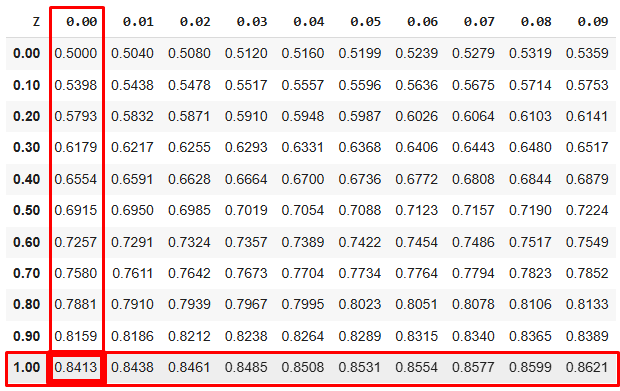


In [33]:
probabilidade = 0.8413

<font size=5>Solução 2 - Utilizando Scipy </font>  

*Sendo: cmd = cumulative distribution function*

In [34]:
from scipy.stats import norm
norm.cdf(Z)

0.8413447460685431

---
#### Problema B - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

<font size=5>Obter a variável padronizada $Z$ </font>  

In [35]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [36]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

<font size=5> Solução 1 - Utilizando tabela </font>  

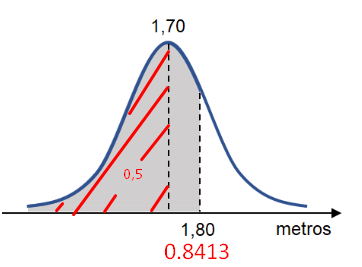

In [37]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

Nos multiplicamos a probabilidade por 2 pois temos duas areas de mesmo valor, uma de 1,60 a 1,70 e outra de 1,70 a 1,80.

In [38]:
probabilidade = 0.8413 - (1 - 0.8413)
probabilidade

0.6826000000000001

<font size=5> Solução 2 - Utilizando Scipy </font>

In [39]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

0.6826894921370863

In [40]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370857

---
#### Problema C - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

 Obter a variável padronizada $Z$

In [41]:
Z = (1.9 - media) / desvio_padrao
Z

1.9999999999999996

Solução 1 - Utilizando tabela

In [42]:
probabilidade = 1 - 0.9772
probabilidade

0.022800000000000042

Solução 2 - Utilizando Scipy

In [43]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

0.02275013194817921

In [44]:
probabilidade = norm.cdf(-Z)
probabilidade

0.022750131948179216

***
# AMOSTRAGEM
***

##  População e Amostra

**População**

É o conjunto completo de elementos de interesse em um estudo.
Pode ser finita (número limitado de elementos, como alunos de uma escola) ou infinita (número ilimitado de elementos, como grãos de areia na praia).
Seus atributos numéricos (média, variância, desvio padrão) são chamados de parâmetros.

**Amostra**

É um subconjunto representativo da população, selecionado para análise.
Permite inferir informações sobre a população sem precisar analisar todos os elementos.
Seus atributos numéricos (média, variância, desvio padrão) são chamados de estatísticas.

**Por que usar uma amostra?**

Existem diversas situações em que utilizar uma amostra é mais vantajoso do que analisar a população inteira:

1.  Populações infinitas: Seria impossível analisar todos os elementos.

2.  Testes destrutivos: Os elementos seriam destruídos durante a análise (ex: testes de colisão de carros).

3.  Resultados rápidos: A análise da amostra é mais rápida e permite obter resultados mais ágeis (ex: pesquisas de opinião).

4. Custos elevados: Analisar toda a população pode ser muito caro.

## Amostragem Aleatória Simples
***

Uma forma comum de selecionar uma amostra é a amostragem aleatória simples, onde cada elemento da população tem a mesma chance de ser escolhido. Isso garante que a amostra seja representativa da população e que as conclusões do estudo sejam válidas.

In [45]:
dados.shape[0]

76840

In [46]:
dados.Renda.mean()

2000.3831988547631

In [47]:
amostra = dados.sample(n = 1000, random_state = 101)

**.sample()**: Este é um método no Pandas que é usado para extrair uma amostra aleatória do DataFrame armazenado em dados.

O código está pegando uma amostra aleatória de 1000 pontos de dados do seu conjunto de dados dados e armazenando-a em uma nova variável chamada amostra. O random_state garante que você obtenha a mesma amostra toda vez que executar o código.

In [48]:
amostra.shape[0]

1000

In [49]:
amostra.Renda.mean()

1998.783

In [50]:
dados.Sexo.value_counts(normalize = True)

,proportion
Sexo,
0,0.692998
1,0.307002


In [51]:
amostra.Sexo.value_counts(normalize = True)

,proportion
Sexo,
0,0.706
1,0.294


## Amostragem Estratificada
***

Imagine que você quer estudar a preferência musical dos estudantes de uma universidade. Se você usar apenas a amostragem aleatória simples, pode acabar selecionando uma amostra com muitos estudantes de um curso específico e poucos de outros, o que pode distorcer os resultados.

A **amostragem estratificada** resolve esse problema dividindo a população em **subgrupos homogêneos**, chamados de **estratos**, com base em características importantes, como curso, idade ou gênero.

Em seguida, aplicamos a **amostragem aleatória simples** dentro de cada estrato, garantindo que todos os subgrupos estejam representados na amostra final de forma proporcional à sua presença na população.

**Vantagens:**


*  Maior precisão nas estimativas, pois a amostra reflete melhor a diversidade da população.
*   Permite analisar as diferenças entre os estratos.







## Amostragem por Conglomerados
***

Agora, imagine que você quer estudar a renda média das famílias de uma cidade. Seria muito trabalhoso listar todas as famílias e aplicar a amostragem aleatória simples.

A **amostragem por conglomerados** facilita esse processo dividindo a população em **subgrupos heterogêneos**, chamados de **conglomerados**, que representam "miniaturas" da população. Por exemplo, poderíamos dividir a cidade em bairros.

Em seguida, selecionamos aleatoriamente alguns conglomerados para análise e, dentro deles, podemos usar a **amostragem aleatória simples** ou **estratificada** para selecionar os elementos finais da amostra.

**Vantagens:**


*   Mais prática e econômica, pois reduz a necessidade de listar todos os elementos da população.
*   Permite estudar populações dispersas geograficamente.






<font size=5> Em resumo</font>

A **amostragem estratificada** busca aumentar a precisão dividindo a população em subgrupos homogêneos, enquanto a **amostragem por conglomerados** visa facilitar a coleta de dados dividindo a população em subgrupos heterogêneos. A escolha da técnica ideal depende do objetivo do estudo e das características da população.

# ESTIMAÇÃO
***

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## Teorema do limite central
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

<font size=5> $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$ </font>

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

<font size=5> Entendendo o Teorema do Limite Central </font>

In [52]:
n = 2000
total_de_amostras = 1500

In [53]:
amostras = pd.DataFrame()
amostras

""


In [54]:
for i in range(total_de_amostras):
  amostra_idade = dados.Idade.sample(n)
  amostra_idade.index = range(amostra_idade.shape[0])
  amostras['Amostra_' + str(i)] = amostra_idade

<ipython-input-54-2abac2b94257>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = amostra_idade
<ipython-input-54-2abac2b94257>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = amostra_idade
<ipython-input-54-2abac2b94257>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [55]:
amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,46,46,44,40,33,36,48,37,29,54,...,59,47,45,43,62,54,57,44,56,29
1,56,61,71,34,43,38,30,35,33,29,...,56,21,38,42,24,49,42,24,60,42
2,48,38,69,54,69,55,28,51,36,34,...,29,24,47,32,49,40,43,62,40,57
3,25,47,63,25,23,36,46,30,22,35,...,41,53,35,55,29,63,77,58,44,44
4,52,23,42,52,39,32,52,46,37,50,...,49,42,24,27,48,34,80,35,59,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,40,32,52,31,50,40,54,24,58,65,...,43,40,53,45,61,25,29,64,33,62
1996,55,47,54,49,50,54,53,24,54,46,...,46,37,46,32,40,24,56,25,21,57
1997,60,51,51,43,26,49,51,37,57,63,...,50,48,61,33,40,36,35,36,38,34
1998,29,43,23,27,46,45,42,28,53,58,...,28,35,32,43,37,49,47,43,42,46


In [56]:
amostras.mean()

,0
Amostra_0,44.2045
Amostra_1,44.0750
Amostra_2,43.9405
Amostra_3,43.8625
Amostra_4,44.6035
...,...
Amostra_1495,44.2445
Amostra_1496,43.7125
Amostra_1497,43.9840
Amostra_1498,44.2450


> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

<Axes: >

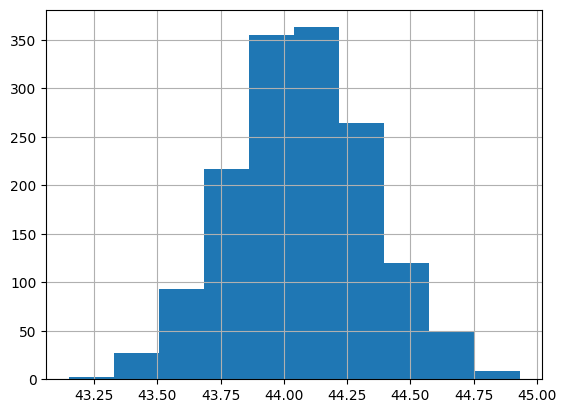

In [57]:
amostras.mean().hist()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [58]:
dados.Idade.mean()

44.07142113482561

In [59]:
amostras.mean().mean()

44.06964333333333

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

<font size=5> $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$ </font>

In [60]:
amostras.mean().std()

0.27602217413817765

In [61]:
dados.Idade.std()

12.480583465360187

In [62]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

##  Níveis de confiança e significância
***

*   O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa.
*   O **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## Erro inferencial
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

<font size=5> $$e = z \frac{\sigma}{\sqrt{n}}$$ </font>

## Intervalos de confiança
***

<font size=5> Intevalo de confiança para a média da população </font>

Com desvio padrão populacional conhecido

 <font size=5> $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$ <font>

 Com desvio padrão populacional desconhecido

 <font size=5> $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$ <font>

## Exemplo

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

 Média amostral

In [79]:
media_amostra = 5050

 Nível de significância ($\alpha$)

In [80]:
significancia = 0.05

 Nível de confiança ($1 - \alpha$)

In [81]:
confianca = 1 - significancia

 Obtendo $z$

In [66]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


 Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

Econtrando Z via tabela:

In [67]:
0.95 / 2

0.475

In [68]:
0.5 + (0.95 / 2)

0.975

<font size=6> Para 95% de confiança sempre teremos: </font>

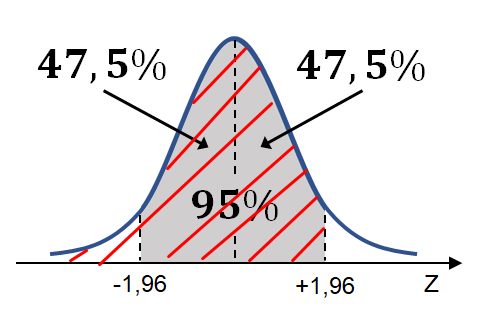

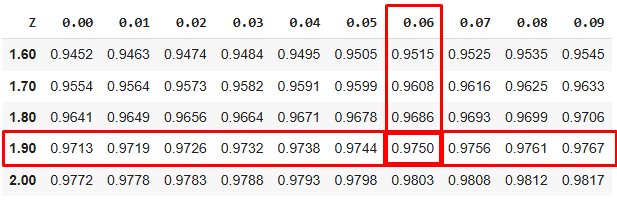

In [69]:
1.9 + 0.06

1.96

Encontrando Z via fórmula:

In [82]:
z = norm.ppf(0.975)
z

1.959963984540054

*.ppf() is the percent point function*

<font size=5> Valores de $z$ para os níveis de confiança mais utilizados </font>

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

 Obtendo $\sigma_\bar{x}$

In [83]:
desvio_padrao = 150

In [84]:
n = 20

In [85]:
raiz_de_n = np.sqrt(n)

In [74]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

 Obtendo $e$

In [75]:
e = z * sigma
e

65.73919054324361

<font size=5> Solução 1 - Calculando o intervalo de confiança para a média </font>

In [88]:
intervalo = media_amostra - e, media_amostra + e
intervalo

(4984.260809456757, 5115.739190543243)

<font size=5> Solução 2 - Calculando o intervalo de confiança para a média </font>

In [78]:
norm.interval(0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

***
# CÁLCULO DO TAMANHO DA AMOSTRA
***

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## Variáveis quantitativas e população infinita
***

<font size=5> $$e = z \frac{\sigma}{\sqrt{n}}$$  </font>

 Com desvio padrão conhecido

<font size=5> $$n = \left(z\frac{\sigma}{e}\right)^2$$ </font>

 Com desvio padrão desconhecido

<font size=5> $$n = \left(z\frac{s}{e}\right)^2$$ </font>

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

<font size= 5 color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

## Exemplo: Rendimento médio

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [89]:
0.95 / 2

0.475

In [90]:
0.5 + (0.95 / 2)

0.975

In [91]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma$

In [96]:
sigma = 3323.39

### Obtendo $e$

In [97]:
e = 100

### Obtendo $n$

In [94]:
n = (z * (sigma / e)) ** 2
int(n.round())

4243

***
## Variáveis quantitativas e população finita
***

 Com desvio padrão conhecido

<font size=5> $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$ </font>

 Com desvio padrão desconhecido

<font size=5> $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$ </font>

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## Exemplo: Indústria de refrigerantes

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [95]:
N = 10000
N

10000

### Obtendo $z$

In [98]:
z = norm.ppf((0.5 + (0.95 / 2)))
z

1.959963984540054

### Obtendo $s$

In [99]:
s = 12
s

12

### Obtendo $e$

In [100]:
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [101]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

22

***
# FIXANDO O CONTEÚDO
***

## Exemplo: Rendimento médio

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

<font size=5> Construindo o dataset conforme especificado pelo problema </font>

In [102]:
renda_5000 = dados.query('Renda <= 5000').Renda

In [103]:
sigma = renda_5000.std()
sigma

1082.794549030635

In [104]:
media = renda_5000.mean()
media

1426.5372144947232

### Calculando o tamanho da amostra

In [105]:
z = norm.ppf(.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())
n

45039

### Calculando o intervalo de confiança para a média

In [110]:
intervalo = norm.interval(0.95, loc = media, scale = sigma / np.sqrt(n))
intervalo

(1416.5372195108241, 1436.5372094786223)

### Análise Gráfica

<Axes: >

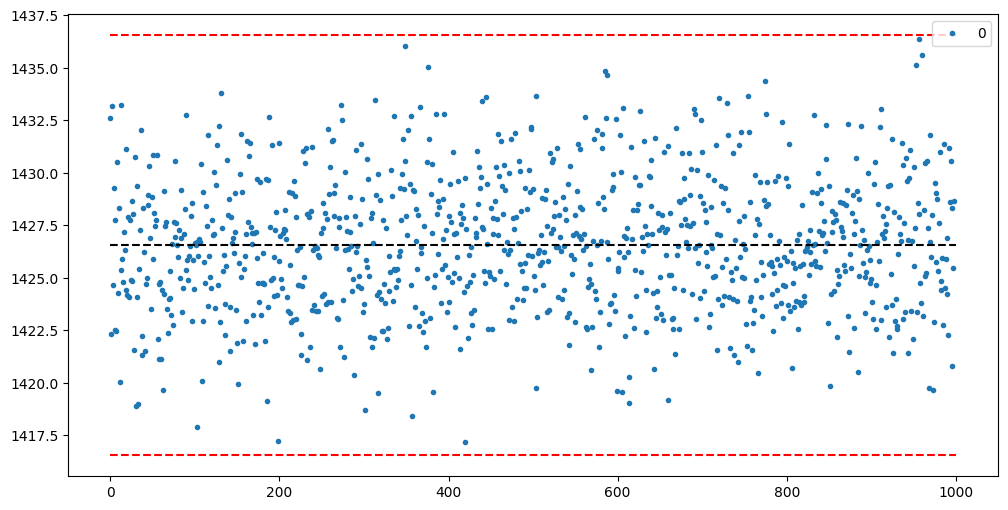

In [111]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax

O gráfico gerado demonstra visualmente o conceito de **distribuições amostrais e intervalos de confiança**.

Cada ponto no gráfico representa a média calculada a partir de uma **amostra aleatória** extraída da população, e a sua distribuição ilustra como as médias amostrais variam naturalmente em torno da verdadeira média populacional.

A linha tracejada preta indica a **média populacional real**, que serve como ponto de referência. As duas linhas tracejadas vermelhas marcam os **limites do intervalo de confiança** calculado, um intervalo dentro do qual se espera que a verdadeira média populacional se encontre com um certo nível de confiança (95% neste caso).

Se repetíssemos este processo de amostragem e cálculo várias vezes, aproximadamente 95% dos intervalos de confiança construídos conteriam a média populacional, evidenciando o conceito de **nível de confiança** e a confiabilidade das estimativas baseadas em amostras.